# NLP: Text vectorization

In [42]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

In [43]:
# Get vectors from text
def get_vectors(*str):
    text = [t for t in str]
    tfidf_vectorizer = TfidfVectorizer()
    tfidf_vectorizer.fit(text)

    my_vector =  tfidf_vectorizer.fit_transform(text)
    return my_vector

def get_cosign_similarity(received_vectors):
    return cosine_similarity(received_vectors)

In [44]:
text1 = 'In the past John liked only sports but now he likes sports and politics'
text2 = 'Sam only liked politics but he is not a fan of both music and international politics'
text3 = 'Sarah likes both books and politics but in the past she oly read books'
text4 = 'Robert loved booth books and nature but now he only read books'
text5 = 'Linda liked music and sports but currently she likes both nature and music'
text6 = 'Alison used to love nature'
text7 = 'In the past I liked only sports but now I like spots and politics'

In [45]:
vectors = get_vectors(text1, text2, text3, text4, text5, text6, text7)
#vectors

In [46]:
cos_sim = get_cosign_similarity(vectors)
cos_sim

array([[1.        , 0.27736302, 0.33454765, 0.22452384, 0.31043311,
        0.        , 0.67565998],
       [0.27736302, 1.        , 0.17236767, 0.13941147, 0.30388341,
        0.        , 0.24680949],
       [0.33454765, 0.17236767, 1.        , 0.42689171, 0.25733467,
        0.        , 0.30764416],
       [0.22452384, 0.13941147, 0.42689171, 1.        , 0.13298311,
        0.08003265, 0.1821408 ],
       [0.31043311, 0.30388341, 0.25733467, 0.13298311, 1.        ,
        0.07922366, 0.21079229],
       [0.        , 0.        , 0.        , 0.08003265, 0.07922366,
        1.        , 0.        ],
       [0.67565998, 0.24680949, 0.30764416, 0.1821408 , 0.21079229,
        0.        , 1.        ]])

## Reduce dimensions to 2 for each text in similarity using PCA

In [58]:
from sklearn.decomposition import PCA

In [59]:
pca = PCA(n_components = 2)
cos_sim_pca =  pca.fit_transform(cos_sim)
print(cos_sim_pca)

[[-0.54577568 -0.14252236]
 [-0.04273938 -0.41654269]
 [-0.16041106  0.52046692]
 [ 0.15216525  0.67542236]
 [ 0.03578942 -0.32964585]
 [ 1.08233152 -0.16413872]
 [-0.52136006 -0.14303966]]


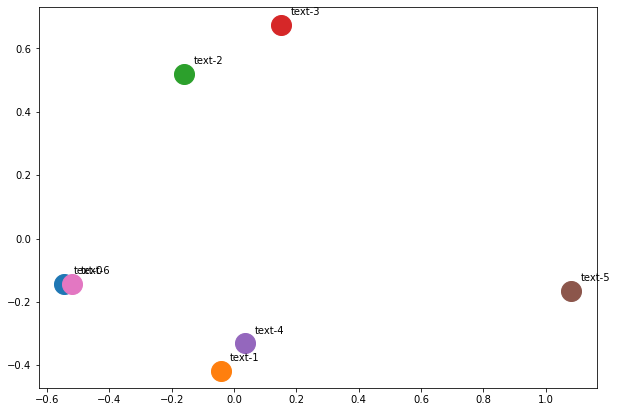

In [60]:
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (10,7)
n = cos_sim_pca.shape[0]
for i in range(n):
    x = cos_sim_pca[i, 0]
    y = cos_sim_pca[i, 1]
    label = f'text-{i}'
    plt.scatter(x, y, s = 400)
    plt.text(x + 0.03, y + 0.03, label)
plt.show()

## Clustering

In [73]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters = 3)
X_new = cos_sim_pca

kmeans.fit(X_new)
print(kmeans.cluster_centers_)
print(kmeans.labels_)

[[-0.26852143 -0.25793764]
 [ 1.08233152 -0.16413872]
 [-0.00412291  0.59794464]]
[0 0 2 2 0 1 0]


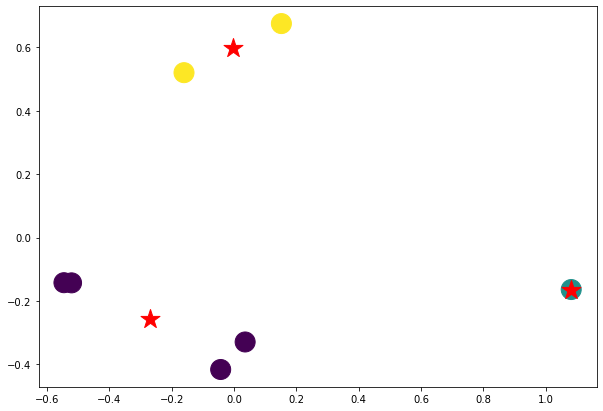

In [75]:
fig, ax = plt.subplots()
ax.scatter(X_new[:,0], X_new[:,1], c=kmeans.labels_, s=400)
ax.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], marker = '*', s=400, c='r')

#for i, txt in enumerate(labels):
#    x = X_new[:,0]
#    y = X_new[:,1]
#    ax.annotate(txt, (x,y))
plt.show()